# Exploratory Data Analysis - Dyspnea dataset

In [15]:
import pandas as pd
import numpy as np
import missingno as msno
import matplotlib.pyplot as plt
import seaborn as sns
import folium
import json
import requests
#import geopandas as gpd
import omnivida_loader as ov
import statsmodels.api         as sm
import statsmodels.formula.api as smf
%matplotlib inline

## Dyspnea scale
This dataset contains the information of 137 patients, where their id, date test and dyspnea scale is stored. 

In [16]:
dyspnea = pd.read_excel(f'../Data/Disnea.xlsx')
df_cp = dyspnea.copy()
df_cp.rename(columns={
    'id':'id_patient',
    'FE_ALTA':'discharge_date',
    'Examen':'medical_test'
},inplace = True)

# Convert to lowercase 
df_cp.columns = [col.lower() for col in df_cp.columns]
df_cp

,id_patient,discharge_date,medical_test
0,1998401,2016-06-02,ESCALA DE DISNEA mMRC EPOC 0
1,1491934,2016-06-10,ESCALA DE DISNEA mMRC EPOC 0
2,801004,2019-07-12,ESCALA DE DISNEA mMRC EPOC 0
3,1226479,2019-07-26,ESCALA DE DISNEA mMRC EPOC 0
4,1241688,2016-09-01,ESCALA DE DISNEA mMRC EPOC 0
...,...,...,...
132,1690591,2016-03-08,ESCALA DE DISNEA mMRC EPOC 4
133,1690591,2016-06-01,ESCALA DE DISNEA mMRC EPOC 4
134,1718360,2016-12-13,ESCALA DE DISNEA mMRC EPOC 4
135,1718360,2018-03-20,ESCALA DE DISNEA mMRC EPOC 4


In [17]:
a = df_cp['id_patient'].unique()
sum = 0
for x in range(len(a)):
    sum += 1;
print("Number of patients is: ", sum)
print("Number of records : ", df_cp.shape[0])

Number of patients is:  56
Number of records :  137


There are 4 different categories, therefore we can convert them to categorical type for the final dataset

,id_patient,discharge_date,medical_test
0,1998401,2016-06-02,ESCALA DE DISNEA mMRC EPOC 0
1,1491934,2016-06-10,ESCALA DE DISNEA mMRC EPOC 0
2,801004,2019-07-12,ESCALA DE DISNEA mMRC EPOC 0
3,1226479,2019-07-26,ESCALA DE DISNEA mMRC EPOC 0
4,1241688,2016-09-01,ESCALA DE DISNEA mMRC EPOC 0
...,...,...,...
132,1690591,2016-03-08,ESCALA DE DISNEA mMRC EPOC 4
133,1690591,2016-06-01,ESCALA DE DISNEA mMRC EPOC 4
134,1718360,2016-12-13,ESCALA DE DISNEA mMRC EPOC 4
135,1718360,2018-03-20,ESCALA DE DISNEA mMRC EPOC 4


In [18]:
df_cp['medical_test'].replace("ESCALA DE DISNEA mMRC EPOC 0","0",inplace=True)

df_cp['medical_test'].replace("ESCALA DE DISNEA mMRC EPOC 1","1",inplace=True)

df_cp['medical_test'].replace("ESCALA DE DISNEA mMRC EPOC 2","2",inplace=True)

df_cp['medical_test'].replace("ESCALA DE DISNEA mMRC EPOC 3","3",inplace=True)

df_cp['medical_test'].replace("ESCALA DE DISNEA mMRC EPOC 4","4",inplace=True)

# Conver to categorical data (scale 0-4)

df_cp['medical_test'] = df_cp['medical_test'].astype('category')
df_cp['medical_test'].cat.reorder_categories(['0','1','2','3','4'], ordered = True, inplace = True)
df_cp['medical_test'].unique()

[0, 1, 2, 3, 4]
Categories (5, object): [0 < 1 < 2 < 3 < 4]

Order has been set for the medical test scoring

In [19]:
a = df_cp.groupby(['id_patient']).count()
df_cp.columns

Index(['id_patient', 'discharge_date', 'medical_test'], dtype='object')

In [20]:
print("Initial date is: ", min(df_cp['discharge_date']))
print("Final date is: ", max(df_cp['discharge_date']))

Initial date is:  2015-06-13 00:00:00
Final date is:  2019-07-26 00:00:00


In [21]:
a = df_cp.groupby(['id_patient']).count()
df_cp.columns

Index(['id_patient', 'discharge_date', 'medical_test'], dtype='object')

In [22]:
df_cp

,id_patient,discharge_date,medical_test
0,1998401,2016-06-02,0
1,1491934,2016-06-10,0
2,801004,2019-07-12,0
3,1226479,2019-07-26,0
4,1241688,2016-09-01,0
...,...,...,...
132,1690591,2016-03-08,4
133,1690591,2016-06-01,4
134,1718360,2016-12-13,4
135,1718360,2018-03-20,4


Text(0, 0.5, 'Number of patients')

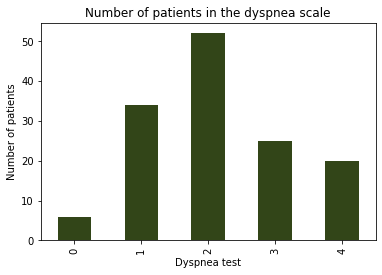

In [23]:
ax = df_cp[["id_patient", 'medical_test']].groupby('medical_test').size().plot(kind='bar', color='#324518')
ax.set_title("Number of patients in the dyspnea scale")
ax.set_xlabel('Dyspnea test')
ax.set_ylabel('Number of patients')


In [24]:
print("Number of records : {0}".format(df_cp.shape[0]))
print("Number patients: ", len(df_cp['id_patient'].unique()))


Number of records : 137
Number patients:  56


In [25]:

zero_scale = df_cp[df_cp['medical_test']=='0'].count()
zero_scale1 = df_cp[df_cp['medical_test']=='1'].count()
zero_scale2 = df_cp[df_cp['medical_test']=='2'].count()
zero_scale3 = df_cp[df_cp['medical_test']=='3'].count()
zero_scale4 = df_cp[df_cp['medical_test']=='4'].count()
frame = [zero_scale[0],zero_scale1[0],zero_scale2[0],zero_scale3[0],zero_scale4[0]]
frame

[6, 34, 52, 25, 20]

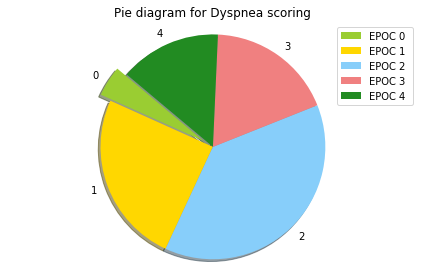

In [26]:
import matplotlib.pyplot as plt

labels = ['0', '1', '2', '3','4']
labels2 = 'EPOC 0', 'EPOC 1 ', 'EPOC 2', 'EPOC 3','EPOC 4'
sizes = frame
colors = ['yellowgreen', 'gold', 'lightskyblue', 'lightcoral','forestgreen']
explode = (0.1, 0, 0, 0,0)  # explode 1st slice

patches, texts = plt.pie(sizes,  explode=explode, labels=labels, colors=colors,  shadow=True, startangle=500)
plt.legend(patches, labels2, loc="best")
plt.title("Pie diagram for Dyspnea scoring")
plt.axis('equal')
plt.tight_layout()
plt.show()

In [27]:
df_cp.to_csv('./data/cleansed/disnea.csv', sep=',')

Number of patients is:  56
Number of records :  137

# ADHERENCE RELATIONSHIP

In [28]:
adherence, adherence_change = ov.get_adherence_dataset()

In [54]:
dyspnea = df_cp.copy()
N_Records_Per_Patient = dyspnea.groupby('id_patient').size().reset_index(name='N_Records')
N_Records_Per_Patient.head(5)

,id_patient,N_Records
0,524006,5
1,540333,1
2,604083,1
3,622031,3
4,664340,1


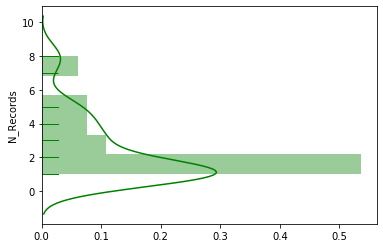

In [65]:
from scipy.stats import norm
sns.distplot(N_Records_Per_Patient['N_Records'], rug = True, vertical = True, color = "green")

In [76]:
num_records_per_category = adherence.groupby('category').size().sort_values(ascending=True).reset_index(name='count_records')

In [77]:
num_records_per_category

,category,count_records
0,N,10
1,N+,472
2,A-,689
3,M,1285
4,A,2317


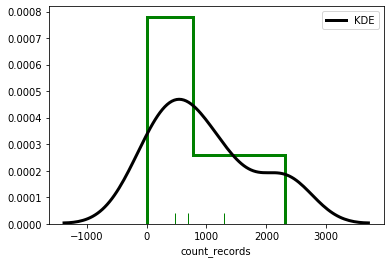

In [78]:
sns.distplot(num_records_per_category['count_records'], rug=True, rug_kws={"color": "g"},
                  kde_kws={"color": "k", "lw": 3, "label": "KDE"},
                  hist_kws={"histtype": "step", "linewidth": 3,
                            "alpha": 1, "color": "g"})

In [94]:
print("N. Pacientes - dataset Adher: ", adherence.groupby('id_patient').count().shape[0])

N. Pacientes - dataset Adher:  840


In [97]:
dyspnea_adher = adherence.merge(dyspnea, how = "left", on = "id_patient" )
dyspnea_adher.dtypes

id_patient                      int64
survey_date            datetime64[ns]
morisky_green                  object
smaq1                          object
smaq2                          object
espa                           object
nm_espa                       float64
qualitative_result             object
quantitative_result            object
category                     category
discharge_date         datetime64[ns]
medical_test                 category
dtype: object

In [100]:
dyspnea_adher.groupby('discharge_date').size()

<bound method Series.unique of 0      NaT
1      NaT
2      NaT
3      NaT
4      NaT
        ..
6386   NaT
6387   NaT
6388   NaT
6389   NaT
6390   NaT
Name: discharge_date, Length: 6391, dtype: datetime64[ns]>